In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np

C:\Users\kulka\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import re
sentences = """We are about to study the idea of computational proces. Computational processes are abstract beings that inhabit computers. As they evolve. processes manipulate other abstract things called data. The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect, we conjure the spirits of the computer with out spells."""

In [3]:
sentences = re.sub('[^A-Za-z0-9]+',' ', sentences)

In [5]:
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ',sentences).strip()

In [7]:
sentences = sentences.lower()

In [12]:
words = sentences.split()
vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [14]:
word_to_ix = {word: i for  i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [15]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2],words[i - 1],words[i + 1],words[i + 2]]
    target = words[i]
    data.append((context,target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [17]:
embeddings = np.random.random_sample((vocab_size,embed_dim))

In [18]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [43]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x/e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)
def log_softmax_crossentropy_with_logits(logits,target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return(- out + softmax) / logits.shape[0]

In [44]:
def forward(contect_idxs, theta):
    m = embeddings[contect_idxs].reshape(1,-1)
    n = linear(m,theta)
    o = log_softmax(n)
    return m, n, o

In [45]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

In [46]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

Text(0, 0.5, 'Losses')

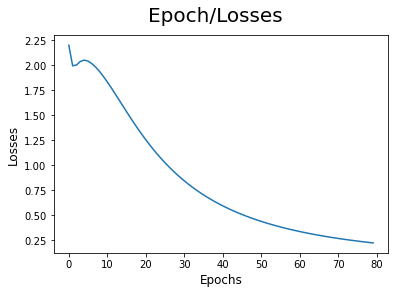

In [48]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
epoch_losses = {}
for epoch in range(80):
    losses = []
    for context, target in data:
        contect_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(contect_idxs, theta)
        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)
        losses.append(loss)
        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
    epoch_losses[epoch] = losses
    ix = np.arange(0,80)
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix, [epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Losses',fontsize=12)
#Text(0, 0.5, 'Losses')

In [49]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    return word

In [50]:
def accuracy():
    wrong = 0
    for context, target in data:
        if(predict(context) != target):
            wrong += 1
    return(1 - (wrong / len(data)))
accuracy()
predict(['processes','manipulate','things','study'])

'other'